In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

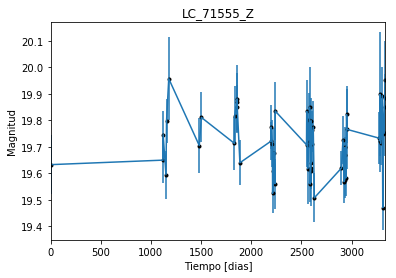

In [2]:
data = np.genfromtxt('LC_71555_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71555_Z')
plt.savefig("LC_71555_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

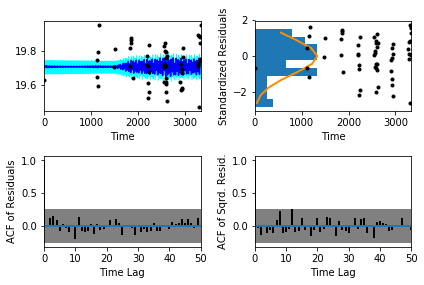

In [5]:
sample.assess_fit()

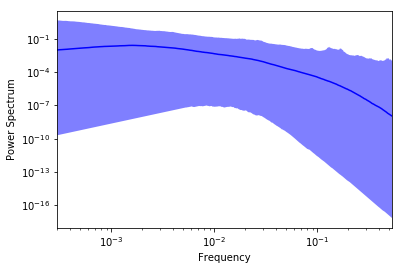

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

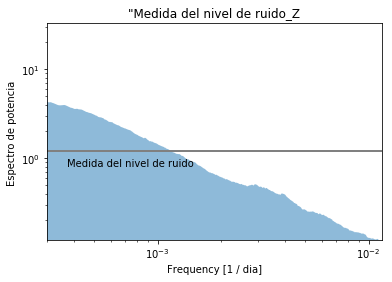

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71555_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_71555_Z')

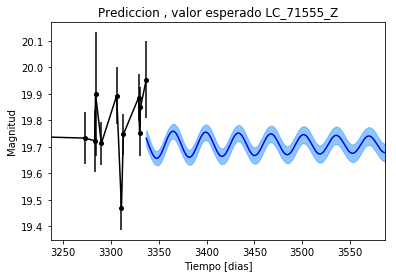

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_71555_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_71555_Z')

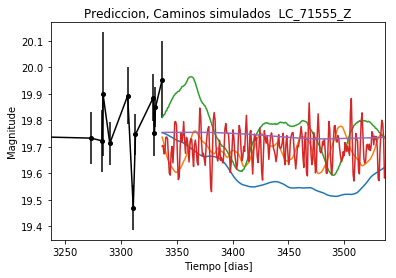

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_71555_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


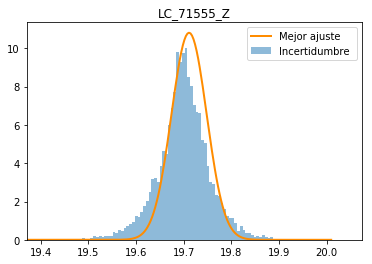

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71555_Z')
plt.savefig("Mejor_ajuste_LC_71555_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_71555_Z')

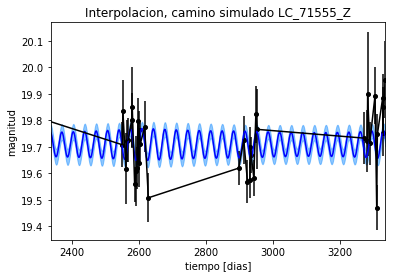

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_71555_Z')

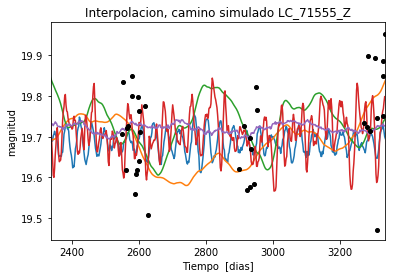

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 907.818342461
Median: 0.010984833527
Standard deviation: 0.174961568484
68% credibility interval: [ 0.00096921  0.13308335]
95% credibility interval: [  3.69146186e-04   6.86417003e-01]
99% credibility interval: [  3.14687533e-04   9.96744186e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 734.796947299
Median: 0.00539522678479
Standard deviation: 0.0906665292424
68% credibility interval: [ 0.00071885  0.04768366]
95% credibility interval: [ 0.00035452  0.32274687]
99% credibility interval: [  3.10230405e-04   6.19602646e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 698.436674537
Median: 0.0261021222162
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 991.747081095
Median: 72.2080547176
Standard deviation: 1.47519423108
68% credibility interval: [ 70.65236791  73.19481517]
95% credibility interval: [ 68.19509313  74.18381966]
99% credibility interval: [ 66.25707482  74.71057242]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 811.875551361
Median: 0.74285855821
Standard deviation: 2.35527769547
68% credibility interval: [ 0.0851741   4.33706348]
95% credibility interval: [ 0.01769701  7.93885116]
99% credibility interval: [  0.01058177  10.33504101]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1072.02510269
Median: 1.78254195914
Standard deviation: 11.4093235052
68% credibility interval: [  0.0900652   17.06178171]
95% credibility interval: [  3.12670738e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15107.4468597
Median: 3.9464947885
Standard deviation: 1.51153919379e+63
68% credibility interval: [  4.57749221e-70   1.02196074e+26]
95% credibility interval: [  7.57138721e-106   8.78518112e+053]
99% credibility interval: [  3.30129015e-130   3.64042162e+060]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2284.65740028
Median: 19.7049906687
Standard deviation: 0.022781676154
68% credibility interval: [ 19.68756856  19.72441294]
95% credibility interval: [ 19.66765661  19.75204339]
99% credibility interval: [ 19.64098606  19.79429166]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 471.750484353
Median: 0.110893797512
Standard deviation: 0.289497595942
68% credibility interval: [ 0.          0.55986527]
95% credibility interval: [ 0.          0.97836364]
99% credibility interval: [ 0.          1.04494491]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 471.750484353
Median: 0.110893797512
Standard deviation: 0.289497595942
68% credibility interval: [ 0.          0.55986527]
95% credibility interval: [ 0.          0.97836364]
99% credibility interval: [ 0.          1.04494491]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 397.339053339
Median: 0.0
Standard deviation: 0.0706526501735
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 991.747081095
Median: 72.2080547176
Standard deviation: 1.47519423108
68% credibility interval: [ 70.65236791  73.19481517]
95% credibility interval: [ 68.19509313  74.18381966]
99% credibility interval: [ 66.25707482  74.71057242]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2317.60055604
Median: 0.00248307016921
Standard deviation: 0.00377037551894
68% credibility interval: [ 0.00062285  0.00571771]
95% credibility interval: [  3.32668252e-05   1.16733107e-02]
99% credibility interval: [  7.64220529e-07   2.04357978e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1577.00861834
Median: 1.10357386
Standard deviation: 0.183115570631
68% credibility interval: [ 0.93724592  1.29119207]
95% credibility interval: [ 0.79282287  1.51245194]
99% credibility interval: [ 0.69780509  1.66793123]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 919.632945046
Median: 9.89558903825e-07
Standard deviation: 0.389069969019
68% credibility interval: [  3.34809810e-28   8.80789354e-03]
95% credibility interval: [  1.38036640e-55   5.48422959e-01]
99% credibility interval: [  1.13740656e-63   2.18464953e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 907.818342461
Median: (-0.0690197446188-4.17077609001j)
Standard deviation: 2.12535565714
68% credibility interval: [-0.83618737-1.19831405j -0.00608975-0.74139671j]
95% credibility interval: [ -4.31288523e+00+0.j          -2.31941389e-03-3.55241586j]
99% credibility interval: [ -6.26272843e+00+0.j          -1.97724008e-03-5.87655673j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 734.796947299
Median: (-0.0338992096631+2.72088904499j)
Standard deviation: 1.90608768218
68% credibility interval: [-0.29960526+1.21584232j -0.00451666+0.02031243j]
95% credibility interval: [-2.02787838+1.53264488j -0.00222753+0.02697038j]
99% credibility interval: [ -3.89307824e+00 +1.85588806e+00j  -1.94923512e-03 +6.40381042e-05j]
Post